In [0]:
from google.colab import drive
drive.mount('/content/drive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import zipfile
data=zipfile.ZipFile('drive/My Drive/Colab Notebooks/259 Project/creditcardfraud.zip')
data.extractall()
data.printdir()

File Name                                             Modified             Size
creditcard.csv                                 2018-03-23 01:17:34    150828752


In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.callbacks import ModelCheckpoint, TensorBoard
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
import numpy as np
from sklearn.metrics import (confusion_matrix, precision_recall_curve, auc,
                             roc_curve, recall_score, classification_report, f1_score,
                             precision_recall_fscore_support)

Using TensorFlow backend.


In [2]:
df = pd.read_csv('creditcard.csv')
df.shape
df.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [3]:
df['Class'].unique()


array([0, 1])

In [4]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
print(X.shape,y.shape)

(284807, 30) (284807,)


In [0]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [0]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [0]:
dnn = Sequential([
    Dense(units=16, kernel_initializer='uniform', input_dim=30, activation='relu'),
    Dense(units=18, kernel_initializer='uniform', activation='relu'),
    Dropout(0.25),
    Dense(20, kernel_initializer='uniform', activation='relu'),
    Dense(24, kernel_initializer='uniform', activation='relu'),
    Dense(1, kernel_initializer='uniform', activation='sigmoid')
])


In [8]:
dnn.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                496       
_________________________________________________________________
dense_2 (Dense)              (None, 18)                306       
_________________________________________________________________
dropout_1 (Dropout)          (None, 18)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 20)                380       
_________________________________________________________________
dense_4 (Dense)              (None, 24)                504       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 25        
Total params: 1,711
Trainable params: 1,711
Non-trainable params: 0
_________________________________________________________________


In [0]:
dnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [0]:
dnn.fit(X_train, Y_train, batch_size=15, epochs=10)

In [0]:
score = dnn.evaluate(X_test, Y_test, batch_size=128)
print('\nAnd the Score is ', score[1] * 100, '%')

56962/56962 [==============================] - 0s 6us/step

And the Score is  99.91748885221726 %


In [0]:

#opt = Adam(lr=0.0011, decay=0.001)
#opt = SGD(lr=0.015, momentum=0.0, decay=0.001, nesterov=False)
dnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

checkpointer = ModelCheckpoint(filepath="model.h5",
                               verbose=1,
                               save_best_only=True)
tensorboard = TensorBoard(log_dir='./logs',
                          histogram_freq=0,
                          write_graph=True,
                          write_images=True)

history = dnn.fit(X_train, Y_train, batch_size=32, epochs=100,
                  validation_data=(X_test, Y_test),
                        verbose=1,
                    callbacks=[checkpointer, tensorboard]).history

Train on 227845 samples, validate on 56962 samples
Epoch 1/100
227845/227845 [==============================] - 11s 49us/step - loss: 0.0019 - acc: 0.9997 - val_loss: 0.0064 - val_acc: 0.9993

Epoch 00001: val_loss improved from inf to 0.00641, saving model to model.h5
Epoch 2/100
227845/227845 [==============================] - 11s 47us/step - loss: 0.0018 - acc: 0.9996 - val_loss: 0.0063 - val_acc: 0.9993

Epoch 00002: val_loss improved from 0.00641 to 0.00631, saving model to model.h5
Epoch 3/100
227845/227845 [==============================] - 11s 47us/step - loss: 0.0017 - acc: 0.9997 - val_loss: 0.0062 - val_acc: 0.9992

Epoch 00003: val_loss improved from 0.00631 to 0.00621, saving model to model.h5
Epoch 4/100
227845/227845 [==============================] - 11s 47us/step - loss: 0.0019 - acc: 0.9997 - val_loss: 0.0064 - val_acc: 0.9992

Epoch 00004: val_loss did not improve from 0.00621
Epoch 5/100
227845/227845 [==============================] - 11s 47us/step - loss: 0.0019 -

In [0]:
%matplotlib inline

sns.set(style='dark',palette='deep', font_scale=1.5)

rcParams['figure.figsize'] = 15, 10

RANDOM_SEED = 7
LABELS = ["Normal", "Fraud"]

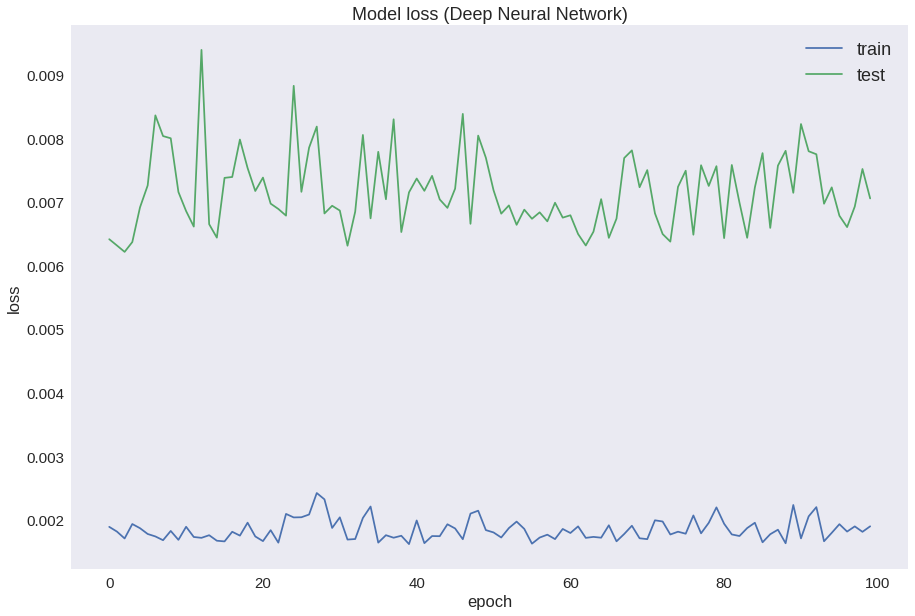

In [0]:
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('Model loss (Deep Neural Network)')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right', fontsize = 'medium')

In [0]:
predictions = dnn.predict(X_test)

mse = np.mean(np.power(X_test - predictions, 2), axis=1)
error_df = pd.DataFrame({'reconstruction_error': mse,
                        'true_class': Y_test})

error_df.describe()

,reconstruction_error,true_class
count,56962.000000,56962.000000
mean,0.988088,0.001527
std,3.693288,0.039052
min,0.161925,0.000000
25%,0.421178,0.000000
50%,0.613497,0.000000
75%,0.905899,0.000000
max,448.587041,1.000000


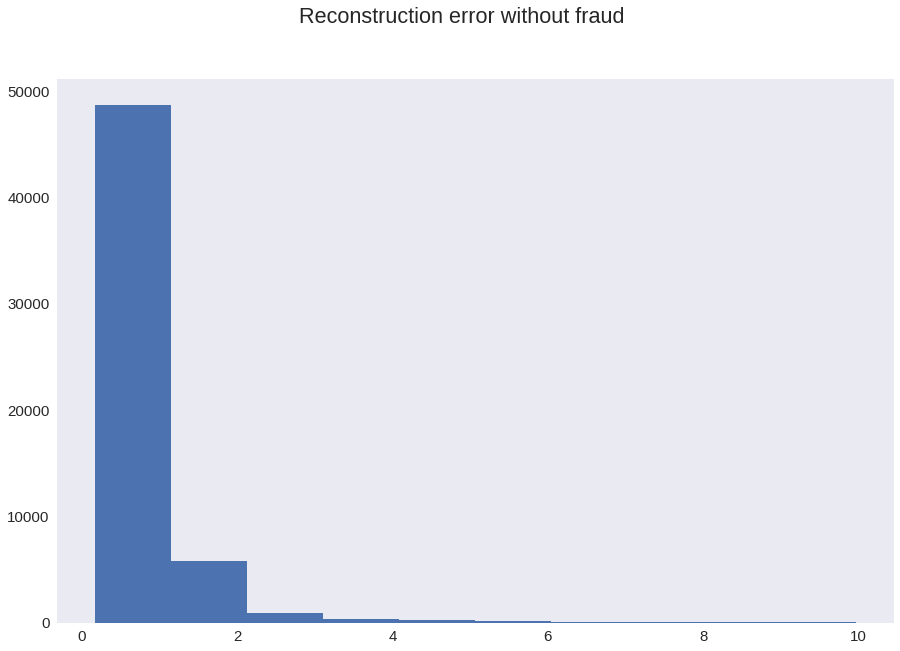

In [0]:
fig = plt.figure()
fig.suptitle('Reconstruction error without fraud')
ax = fig.add_subplot(111)
normal_error_df = error_df[(error_df['true_class']== 0) & (error_df['reconstruction_error'] < 10)]
_ = ax.hist(normal_error_df.reconstruction_error.values, bins=10)

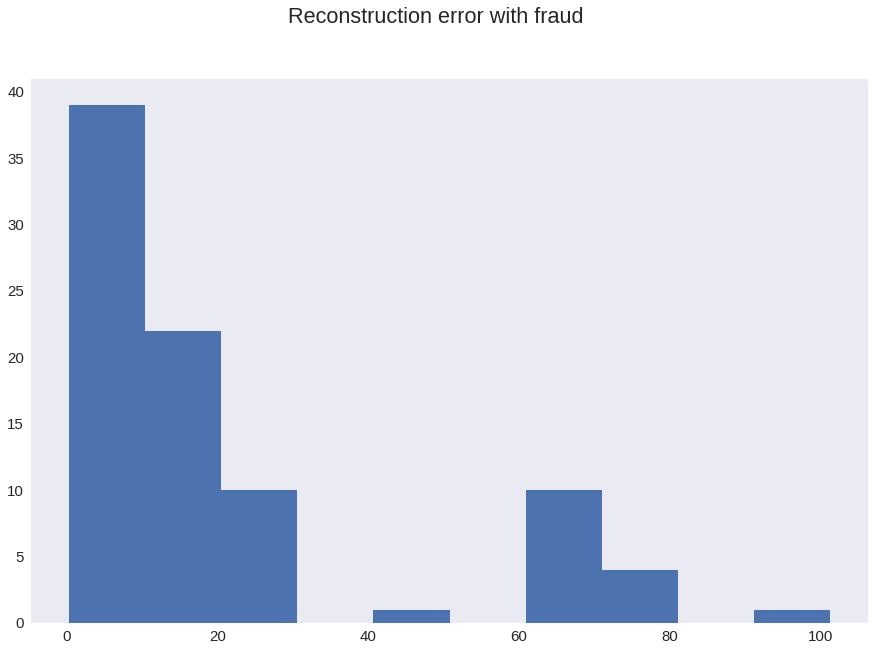

In [0]:
fig = plt.figure()
fig.suptitle('Reconstruction error with fraud')
ax = fig.add_subplot(111)
fraud_error_df = error_df[error_df['true_class'] == 1]
_ = ax.hist(fraud_error_df.reconstruction_error.values, bins=10)

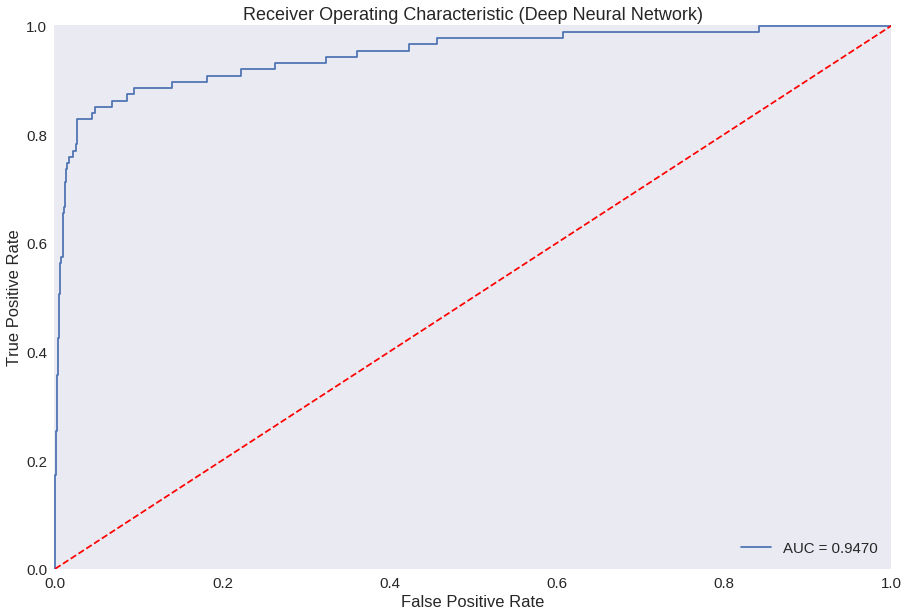

In [0]:
fpr, tpr, thresholds = roc_curve(error_df.true_class, error_df.reconstruction_error)
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic (Deep Neural Network)')
plt.plot(fpr, tpr, label='AUC = %0.4f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.001, 1])
plt.ylim([0, 1.001])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

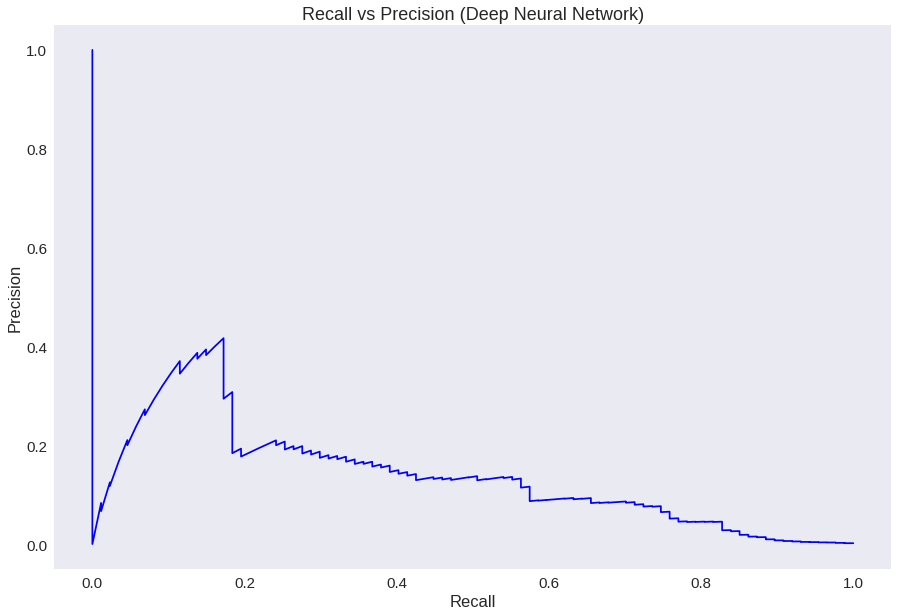

In [0]:
precision, recall, th = precision_recall_curve(error_df.true_class, error_df.reconstruction_error)
plt.plot(recall, precision, color='b', label='Precision-Recall curve')
plt.title('Recall vs Precision (Deep Neural Network)')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

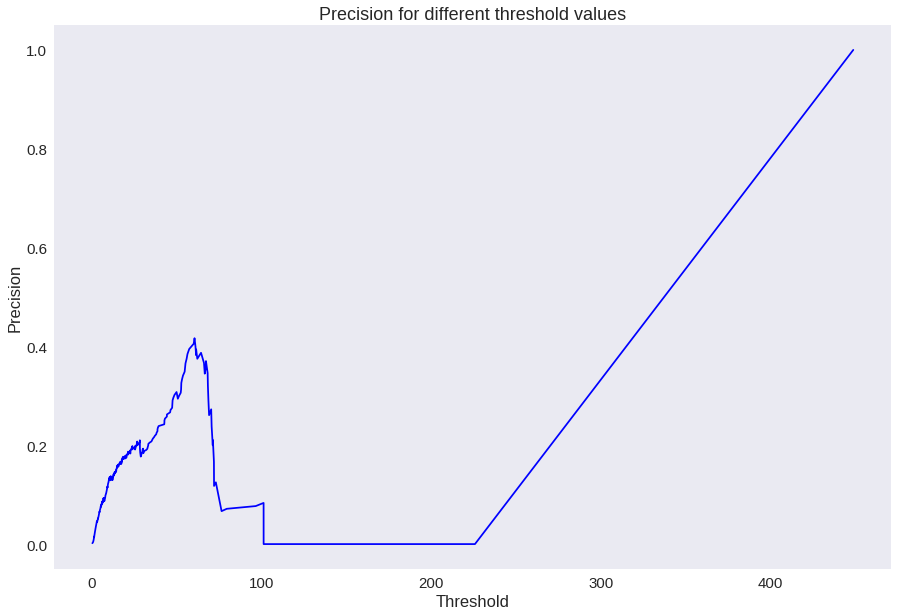

In [0]:
plt.plot(th, precision[1:], color='b', label='Threshold-Precision curve')
plt.title('Precision for different threshold values')
plt.xlabel('Threshold')
plt.ylabel('Precision')
plt.show()

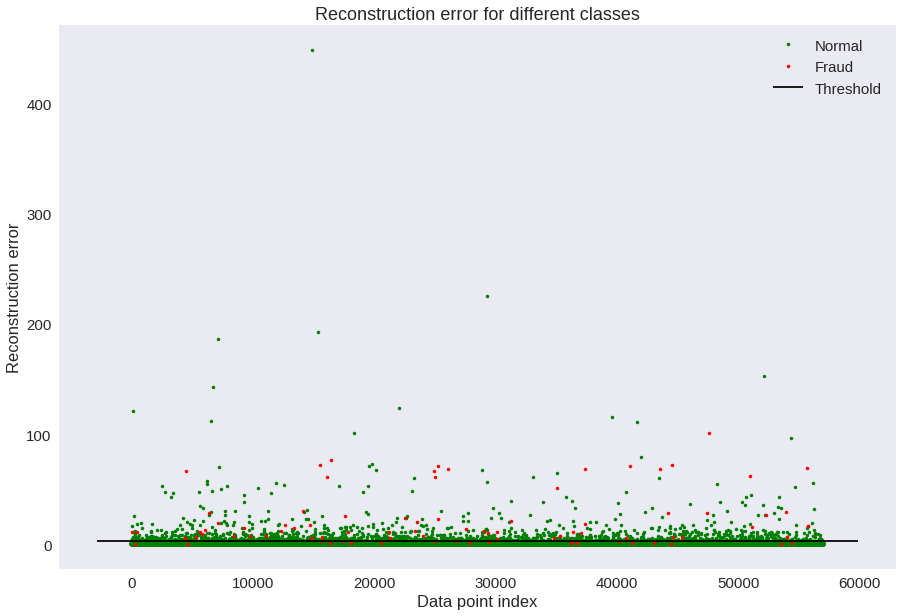

In [0]:
THRESHOLD = 2.75
groups = error_df.groupby('true_class')
fig, ax = plt.subplots()

for name, group in groups:
    ax.plot(group.index, group.reconstruction_error, marker='o', ms=3.5, linestyle='',
            label= "Fraud" if name == 1 else "Normal", color='r' if name==1 else 'g')
ax.hlines(THRESHOLD, ax.get_xlim()[0], ax.get_xlim()[1], colors='black', zorder=100, label='Threshold')
ax.legend()
plt.title("Reconstruction error for different classes")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
plt.show()

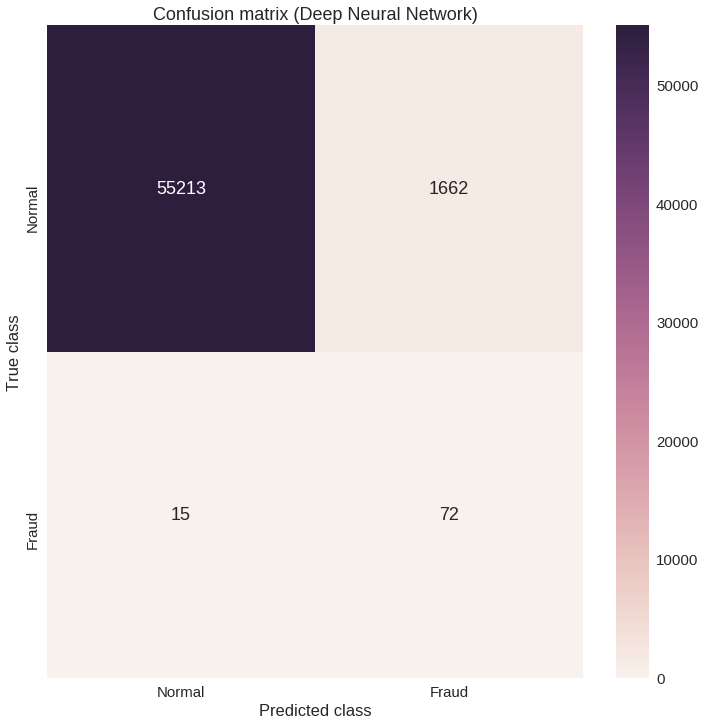

In [76]:
y_pred = [1 if e > THRESHOLD else 0 for e in error_df.reconstruction_error.values]
conf_matrix = confusion_matrix(error_df.true_class, y_pred)

plt.figure(figsize=(12, 12))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d",vmin=0, vmax=55000)
plt.title("Confusion matrix (Deep Neural Network)")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

In [10]:
from keras.utils import plot_model
import pydot
plot_model(dnn, to_file='model.png')

OSError: ignored